<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II - R4001

# TAREA SEMANAL 8

Autor: Nicolás Burgos


### ENUNCIADO

Dado el siguiente esquema:

![alt text](block_diag.png)

Se pide:

1. Comprobar que el esquema se corresponde con la siguiente transferecia:

\begin{equation} 
H(z) = (1 - c_1 \cdot z^{-N}) \cdot \frac{b_0 + b_1 \cdot z^{-1} + b_2 \cdot z^{-2}}{\frac{1}{a_0} - a_1 \cdot z^{-1} - a_2 \cdot z^{-2}}
\end{equation}

2. Filtro de **media móvil** (moving average ó CIC: cascaded integrator comb)

    (a) Verificar la transferencia para $a_0 = 1$, $b_0 = \frac{1}{N}$, $c_1 = 1$ y $N = 3, 4, 5$.
    
    (b) ¿Es un filtro FIR o IIR? Discuta las ventajas que tendría esta implementación respecto al filtro FIR de media móvil 3.

    (C) ¿Podría implementar el siguiente sistema $h(k) = (1, 1, 1, 1, 1, 1, 1)$ con esta topología?

3. Filtro de **diferenciador** (differentiator):

    (a) Obtener los valores de $a_i$ y $b_i$ para obtener $y(n) = \frac{x(n) - x(n - 2)}{2}$ 

    (b) Evaluar al sistema con un seno discreto en python y comprobar si la salida se aproxima a la derivada.

4. Filtro de **elimina continua** (DC Blocker):

    (a) Verifique la transferencia para $a_0 = 1$, $a_1 = \beta$, $b_0 = 1$, $b_1 = -1$, para $\beta = 0.9$

    (b) Determine $\beta$ para que la transferencia en $\Omega = 0.1 \cdot \pi$ sea 3 dB menor a la transferencia en $\Omega = \pi$
 
5. Filtro de **Peine** (Comb Filter):

    (a) Verifique la transferencia para $c_1 = -1$ y $N = 8$.

    (b) Proponga una $f_{sampling}$ y halle las frecuencias donde se generan los *peaks* y los *nulls* en el espectro.

Importante: Para los siguientes incisos calcular y representar sus singularidades en el plano $z$, su Respuesta de módulo y fase de $H(z)$ y su diagrama en bloques. Cuando no se indique considerar los coeficientes igual a cero.

6. Verificar en Python el punto (3) con la función "*diff*".

7. Utilizando solo el *biquad*, hallar los valores de los coeficientes para emular la respuesta analógica de un pasatodo de orden 1. Utilice alguno de los métodos de diseño vistos en clases. 

### RESOLUCIÓN

#### PUNTO #1

Realizando el siguiente análisis del diagrama en bloques propuesto, se procede a establecer 3 ecuaciones que nos permitirán encontrar la transferencia pedida:

![alt text](block_diag_analisis.png)

\begin{equation} 
(1) \rightarrow M(z) = X(z) - c_1 \cdot X(z) \cdot z^{-N}
\end{equation}

\begin{equation} 
(2) \rightarrow G(z) = M(z) + a_0 a_1 \cdot G(z) \cdot z^{-1} + a_0 a_2 \cdot G(z) \cdot z^{-2}
\end{equation}

\begin{equation} 
(3) \rightarrow Y(z) = a_0 b_0 \cdot G(z) + a_0 b_1 \cdot G(z) \cdot z^{-1} + a_0 b_2 \cdot G(z) \cdot z^{-2}
\end{equation}

Operando algebráicamente, se obtienen los siguientes resultados:

\begin{equation} 
G(z) = \frac{Y(z)}{a_0 \cdot (b_0 + b_1 \cdot z^{-1} + b_2 \cdot z^{-2})}
\end{equation}

\begin{equation} 
M(z) = G(z) \cdot (1 - a_0 a_1 \cdot z^{-1} - a_0 a_2 \cdot z^{-2}) = X(z) \cdot (1 - c_1 \cdot z^{-N})
\end{equation}

Conociendo ahora las expresiones de $M(z)$ y $G(z)$ en función de $X(z)$ e $Y(z)$, calculamos la transferencia pertinente:

\begin{equation} 
H(z) = \frac{Y(z)}{X(z)} = (1 - c_1 \cdot z^{-N}) \cdot \frac{b_0 + b_1 \cdot z^{-1} + b_2 \cdot z^{-2}}{\frac{1}{a_0} - a_1 \cdot z^{-1} - a_2 \cdot z^{-2}}
\end{equation}

#### PUNTO #2:

**(a)** Verificamos la transferencia obtenida para los valores pedidos, es decir, $a_0 = 1$, $b_0 = \frac{1}{N}$, $c_1 = 1$ y $N = 3, 4, 5$, sin embargo, dejamos la expresión en función de $N$:

\begin{equation} 
H_N(z) = \frac{1}{N} \cdot \frac{1 - z^{-N}}{1 - z^{-1}}
\end{equation}

Ahora, para cada valor de N pedido, se muestra a continuación la transferencia resultante, sus expresiones y gráficos de módulo y fase, diagrama de polos y ceros, y, al final, el diagrama en bloques para todo valor de N.

\begin{equation} 
\rightarrow H_3(z) = \frac{1}{3} \cdot \frac{1 - z^{-3}}{1 - z^{-1}}
\end{equation}

\begin{equation} 
|H_3(\Omega)| = \left |\frac{sinc(\frac{3\Omega}{2})}{sinc(\frac{\Omega}{2})} \right|
\end{equation}

\begin{equation} 
\theta[H_3(\Omega)] = - \Omega
\end{equation}

\begin{equation} 
CEROS \rightarrow z_{z_1} = 1 \quad ; \quad z_{z_{23}} = -\frac{1}{2} \pm j \frac{\sqrt{3}}{2}
\end{equation}

\begin{equation} 
POLOS \rightarrow z_{p_1} = 1 \quad ; \quad z_{z_{23}} = 0
\end{equation}

![alt text](ma_n3.png)

\begin{equation} 
\rightarrow H_4(z) = \frac{1}{4} \cdot \frac{1 - z^{-4}}{1 - z^{-1}}
\end{equation}

\begin{equation} 
|H_4(\Omega)| = \left |\frac{sinc(2 \Omega)}{sinc(\frac{\Omega}{2})} \right|
\end{equation}

\begin{equation} 
\theta[H_4(\Omega)] = - \frac{3 \Omega}{2}
\end{equation}

\begin{equation} 
CEROS \rightarrow z_{z_{12}} = \pm 1 \quad ; \quad z_{z_{34}} = \pm j
\end{equation}

\begin{equation} 
POLOS \rightarrow z_{p_1} = 1 \quad ; \quad z_{z_{234}} = 0
\end{equation}

![alt text](ma_n4.png)

\begin{equation} 
\rightarrow H_5(z) = \frac{1}{5} \cdot \frac{1 - z^{-5}}{1 - z^{-1}}
\end{equation}

\begin{equation} 
|H_5(\Omega)| = \left |\frac{sinc(\frac{5 \Omega}{2})}{sinc(\frac{\Omega}{2})} \right|
\end{equation}

\begin{equation} 
\theta[H_5(\Omega)] = -2 \Omega
\end{equation}

\begin{equation} 
CEROS \rightarrow z_{z_1} = 1 \quad ; \quad z_{z_{23}} = 0.309 \pm j 0.951 \quad ; \quad z_{z_{45}} = -0.809 \pm j 0.588
\end{equation}

\begin{equation} 
POLOS \rightarrow z_{p_1} = 1 \quad ; \quad z_{z_{2345}} = 0
\end{equation}

![alt text](ma_n5.png)

![alt text](ma_block_diag.png)

**(b)** Debido a la presencia de más de un término en el denominador, se puede decir que el filtro es del tipo IIR. Sin embargo, si se trabaja matemáticamente cualquiera de las expresiones obtenidas en el inciso anterior, se podrá observar cómo el polo generado por la recursividad se cancela con uno de los ceros, presentando una transferencia FIR. En otras palabras, resulta ser un filtro FIR implementado recursivamente.

Como ventajas de implemetar un Filtro de Media Móvil o CIC de esta forma frente a un FIR de Media Móvil Directo, podemos mencionar las siguientes:

1. Resulta muy eficiente en hardware para ventanas largas, ya que solo usa acumuladores y restas sin necesidad de muchos multiplicadores.
2. Esto permite poder calcular una salida por medio de dos sumas y una resta, con memoria de las últimas "N" muestras:

\begin{equation}
y(n) = x(n) + y(n - 1) - x(n - N)
\end{equation}

3. Es posible de realizar con pocos recursos cuando N es grande, ya que el integrador acumula a la tasa alta, y el comb opera a la tasa baja.

**(c)** El sistema presentado se corresponde con una sucesion de 7 deltas discretas, separadas entre sí por una muestra, y sólo será posible de implementar si se toma $b_0 = 1$ y $N = 7$. De esta forma, se obtiene:

\begin{equation} 
H_7(z) = \frac{1 - z^{-7}}{1 - z^{-1}}
\end{equation}

Si se quisiera mantener $b_0 = 1/N$ con $N = 7$, se obtendrá un Filtro de Media Móvil normalizado:

\begin{equation} 
H_7(z) = \frac{1}{7} \cdot \frac{1 - z^{-7}}{1 - z^{-1}}
\end{equation}

\begin{equation} 
h_7(k) = \frac{1}{7} \cdot (1,1,1,1,1,1,1)
\end{equation}

#### PUNTO #3:

**(a)** Si transformamos la expresión de $y(n)$ al dominio z se obtiene la siguiente expresión:

\begin{equation}
y(n) = \frac{x(n) - x(n - 2)}{2} \rightarrow Y(z) = \frac{X(z) - X(z) \cdot z^{-2}}{2} = X(z) \cdot \frac{1 - z^{-2}}{2}
\end{equation}

\begin{equation}
H(z) = \frac{Y(z)}{X(z)} = \frac{1 - z^{-2}}{2}
\end{equation}

Al comparar esta expresión con la transferencia total, es de simple inspección determinar los valores de los coeficientes:

\begin{equation}
b_1 = a_1 = a_2 = 0 \quad ; \quad b_0 = \frac{1}{2} \quad ; \quad b_2 = -\frac{1}{2} \quad ; \quad a_0 = 1
\end{equation}

Luego, para la transferencia encontrada, se determinan sus expresiones y gráficos de módulo y fase, diagrama de polos y ceros, y diagrama en bloques resultantes:

\begin{equation} 
\rightarrow H(z) = \frac{1 - z^{-2}}{2}
\end{equation}

\begin{equation} 
|H(\Omega)| = \left |sen(\Omega) \right|
\end{equation}

\begin{equation} 
\theta[H(\Omega)] = - \Omega + \frac{\pi}{2}
\end{equation}

\begin{equation} 
CEROS \rightarrow z_{z_{12}} = \pm 1
\end{equation}

\begin{equation} 
POLOS \rightarrow z_{p_{12}} = 0
\end{equation}

![alt text](diff_graf.png)

**(b)** Para realizar este inciso se utilizó el siguiente código de Python. En el gráfico obtenido, se puede ver que la salida del filtro coincide casi por completo con la derivada teórica de la entrada. Se presenta una pequeña diferencia de amplitud y un leve desfase.

Coeficientes: b = [ 0.5  0.  -0.5], a = [1.]


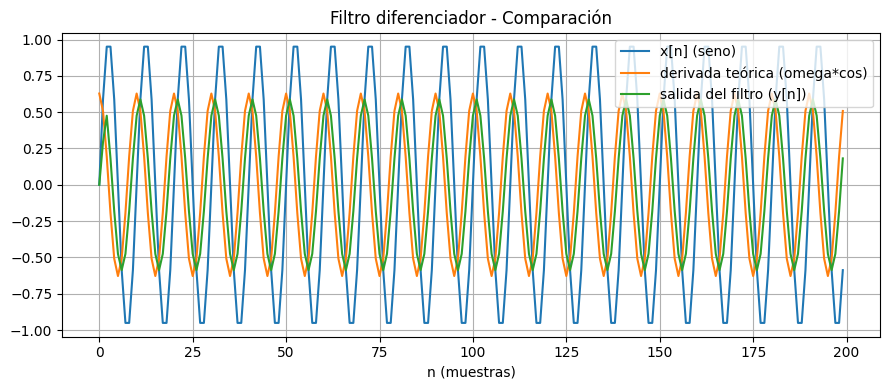

In [ ]:
# Simulación del filtro diferenciador y comparación con la derivada teórica
import numpy as np
from scipy.signal import lfilter
import matplotlib.pyplot as plt

# Coeficientes (según derivación)
b = np.array([1/2, 0.0, -1/2])  # b0, b1, b2
a = np.array([1.0])             # FIR simple (a0=1)

# Señal de prueba: seno discreto
N = 200
n = np.arange(N)
omega = 0.2 * np.pi   # frecuencia angular en rad/muestra (prueba razonable)
x = np.sin(omega * n)

# Filtrar (FIR) -> salida y[n]
y = lfilter(b, a, x)

# Derivada teórica (si interpretamos t = n * T con T = 1)
# dx/dn = omega * cos(omega * n)
y_true = omega * np.cos(omega * n)

# Mostrar resultados (gráfico)
plt.figure(figsize=(9,4))
plt.plot(n, x, label='x[n] (seno)')
plt.plot(n, y_true, label='derivada teórica (omega*cos)')
plt.plot(n, y, label='salida del filtro (y[n])')
plt.legend()
plt.xlabel('n (muestras)')
plt.title(f'Filtro diferenciador - Comparación')
plt.grid(True)
plt.tight_layout()

print(f"Coeficientes: b = {b}, a = {a}")

plt.show()

#### PUNTO #4:

**(a)** Verificamos la transferencia para $a_0 = 1$, $a_1 = \beta$, $b_0 = 1$, $b_1 = -1$, con $\beta = 0.9$:

\begin{equation}
H(z) = \frac{1 - z^{-1}}{1 - \beta \cdot z^{-1}} = \frac{1 - z^{-1}}{1 - 0.9 \cdot z^{-1}} = \frac{z - 1}{z - 0.9}
\end{equation}

Para poder calcular el módulo y fase de esta transferencia, al igual que en los casos anteriores, reemplazaremos en la expresión encontrada $z \rightarrow e^{j\Omega}$, y posteriormente, aplicamos la Fórmula de Euler:

\begin{equation}
H(\Omega) = \frac{e^{j\Omega} - 1}{e^{j\Omega} - 0.9} = \frac{cos(\Omega) + j sen(\Omega) - 1}{cos(\Omega) + j sen(\Omega) - 0.9}
\end{equation}

De esta forma, se muestran a continuación, las expresiones de módulo y fase, junto con sus respectivos gráficos, el diagrama de polos y ceros, y el diagrama en bloques correspondiente. Se puede observar como la fase resulta ser no lineal, debido a la presencia de más de un término en el denominador, indicando recursividad.

\begin{equation}
H(\Omega) = \sqrt{\frac{[cos(\Omega) - 1]^2 + sen^2(\Omega)}{[cos(\Omega) - 0.9]^2 + sen^2(\Omega)}} \cdot e^{j \left [tg^{-1} \left (\frac{sen(\Omega)}{cos(\Omega) - 1} \right) - tg^{-1} \left (\frac{sen(\Omega)}{cos(\Omega) - 0.9} \right) \right]}
\end{equation}

\begin{equation}
|H(\Omega)| = \sqrt{\frac{[cos(\Omega) - 1]^2 + sen^2(\Omega)}{[cos(\Omega) - 0.9]^2 + sen^2(\Omega)}}
\end{equation}

\begin{equation}
\theta[H(\Omega)] = tg^{-1} \left (\frac{sen(\Omega)}{cos(\Omega) - 1} \right) - tg^{-1} \left (\frac{sen(\Omega)}{cos(\Omega) - 0.9} \right)
\end{equation}

\begin{equation}
CEROS \rightarrow z_{z_1} = 1
\end{equation}

\begin{equation}
POLOS \rightarrow z_{p_1} = 0.9
\end{equation}

![alt text](dc_blocker_graf.png)

**(b)** Si queremos que para los dos valores de $\Omega$ planteados, la transferencia tenga una relación de 3dB debemos plantear los siguiente:

\begin{equation}
30 dB = 20 log_{10} \left (\frac{|H(e^{j\pi})|}{|H(e^{j\pi / 10})|} \right) \rightarrow \frac{|H(e^{j\pi})|}{|H(e^{j\pi / 10})|} = \sqrt{2}
\end{equation}

De esta forma, determinamos las siguientes expresiones:

\begin{equation}
|H(e^{j\pi})| = \sqrt{H(e^{j\pi}) \cdot H(e^{-j\pi})} = \frac{2}{1 + \beta}
\end{equation}

\begin{equation}
|H(e^{j\pi / 10})| = \sqrt{H(e^{j\pi / 10}) \cdot H(e^{-j\pi / 10})} = \sqrt{ \frac{2 - 2 cos(\pi / 10)}{1 + \beta^2 - 2\beta cos(\pi / 10)} }
\end{equation}

Utilizando la relación vista más arriba y operando algebráicamente, se obtiene:

\begin{equation}
\beta^2 cos(\pi / 10) - 2\beta + cos(\pi / 10) = 0 \rightarrow \beta = 1.3764 \quad ó \quad \beta = 0.7265 
\end{equation}

De esta forma, como $\beta$ debe estar entre cero y uno ($0 < \beta < 1$), se determina que $\beta = 0.7265$.

#### PUNTO #5:

**(a)** Evaluamos la transferencia encontrada en (1) para $c_1 = -1$ y $N = 8$, y obtenemos la siguiente expresión:

\begin{equation}
H(z) = 1 + z^{-8}
\end{equation}

Para encontrar sus expresiones de módulo y fase, efectuaremos el siguiente desarrollo matemático, reemplazando $z \rightarrow e^{j\Omega}$:

\begin{equation}
H(\Omega) = 1 + e^{-j8\Omega} = e^{j0} + e^{-j8\Omega} = e^{-j4\Omega} \cdot \left ( e^{j4\Omega} + e^{-j4\Omega} \right)
\end{equation}

\begin{equation}
H(\Omega) = 2 \cdot cos(4\Omega) \cdot e^{-j4\Omega}
\end{equation}

De esta forma, a continuación se detallan las expresiones de módulo y fase, junto con sus respectivos gráficos, el diagrama de polos y ceros, y el diagrama en bloques resultante:

\begin{equation}
|H(\Omega)| = 2 \cdot |cos(4\Omega)|
\end{equation}

\begin{equation}
\theta[H(\Omega)] = -4\Omega
\end{equation}

\begin{equation}
CEROS \rightarrow z_{z_{12}} = 0.924 \pm 0.383 \quad ; \quad z_{z_{34}} = -0.924 \pm 0.383 \quad ; \quad z_{z_{56}} = 0.383 \pm 0.924 \quad ; \quad z_{z_{78}} = -0.383 \pm 0.924
\end{equation}

\begin{equation}
POLOS \rightarrow z_{z_{12345678}} = 0
\end{equation}

![alt text](comb_graf.png)

**(b)** Reescribimos la expresión de $H(\Omega)$ encontrada más arriba:

\begin{equation}
H(\Omega) = 2 \cdot cos(4\Omega) \cdot e^{-j4\Omega}
\end{equation}

Para encontrar los picos o *peaks* de esta transferencia, debemos buscar los valores de $\Omega$ para los que el coseno es máximo:

\begin{equation}
cos(4\Omega) = \pm 1
\end{equation}

\begin{equation}
4\Omega = k\pi \quad \rightarrow \quad \Omega = \frac{k\pi}{4} \quad / \quad k \epsilon \mathbb{Z}
\end{equation}

Por otro lado, para encontrar los nulos o *nulls*, se deben buscar los valores de $\Omega$ para los cuales el coseno se anula:

\begin{equation}
cos(4\Omega) = 0
\end{equation}

\begin{equation}
4\Omega = \frac{\pi}{2} + k\pi \quad \rightarrow \quad \Omega = \frac{\pi}{4} \left (\frac{1}{2} + k \right) \quad / \quad k \epsilon \mathbb{Z}
\end{equation}

Si pasamos a frecuencia los resultados obtenidos, encontramos lo siguiente:

\begin{equation}
\rightarrow PICOS: \quad f_{PICO} = \frac{k}{8} \cdot f_s \quad / \quad k \epsilon \mathbb{Z}
\end{equation}

\begin{equation}
\rightarrow NULOS: \quad f_{NULO} = \frac{f_s}{8} \cdot \left (\frac{1}{2} + k \right) \quad / \quad k \epsilon \mathbb{Z}
\end{equation}

A modo de ejemplo, proponemos una $f_s = 8KHz$:

\begin{equation}
\rightarrow PICOS: \quad f_{PICO} = \frac{k}{8} \cdot f_s = [1KHz;2KHz;3KHz;4KHz;...]
\end{equation}

\begin{equation}
\rightarrow NULOS: \quad f_{NULO} = \frac{f_s}{8} \cdot \left (\frac{1}{2} + k \right) = [500Hz;1.5KHz;2.5KHz;3.5KHz;...]
\end{equation}

#### PUNTO #6:

Para verificar el punto (3) por medio de la función "diff", utilizaremos el mismo código visto más arriba, pero agregando una nueva parte al final con la función pedida. Es posible observar gran coincidencia de gráficos, verificando lo calculado y simulado antes.

Coeficientes: b = [ 0.5  0.  -0.5], a = [1.]


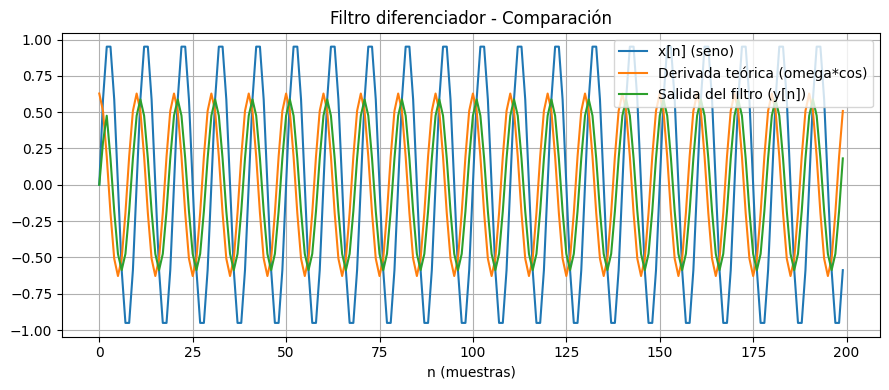

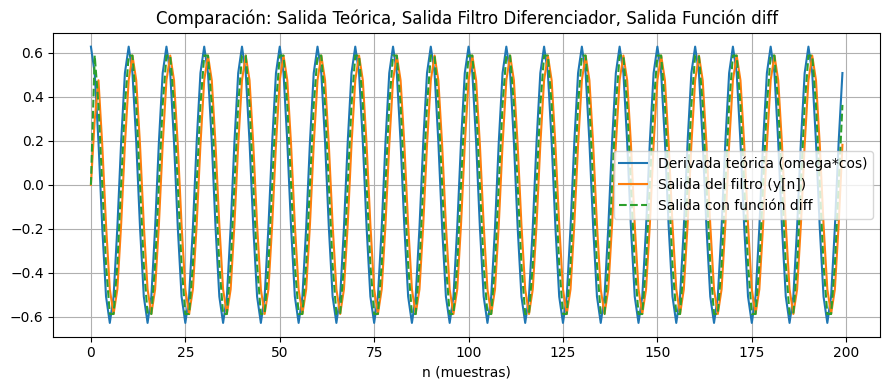

In [1]:
# Simulación del filtro diferenciador y comparación con la derivada teórica
import numpy as np
from scipy.signal import lfilter
import matplotlib.pyplot as plt

# Coeficientes (según derivación)
b = np.array([1/2, 0.0, -1/2])  # b0, b1, b2
a = np.array([1.0])             # FIR simple (a0=1)

# Señal de prueba: seno discreto
N = 200
n = np.arange(N)
omega = 0.2 * np.pi   # frecuencia angular en rad/muestra (prueba razonable)
x = np.sin(omega * n)

# Filtrar (FIR) -> salida y[n]
y = lfilter(b, a, x)

# Derivada teórica (si interpretamos t = n * T con T = 1)
# dx/dn = omega * cos(omega * n)
y_true = omega * np.cos(omega * n)

# Mostrar resultados (gráfico)
plt.figure(figsize=(9,4))
plt.plot(n, x, label='x[n] (seno)')
plt.plot(n, y_true, label='Derivada teórica (omega*cos)')
plt.plot(n, y, label='Salida del filtro (y[n])')
plt.legend()
plt.xlabel('n (muestras)')
plt.title(f'Filtro diferenciador - Comparación')
plt.grid(True)
plt.tight_layout()

print(f"Coeficientes: b = {b}, a = {a}")

plt.show()

# Derivada "numérica" de la señal usando diff (aprox primera derivada)
dy_diff = np.diff(x)  # longitud N-1

# Para comparar con y[n], ajustamos índices (desfasaje de 1 muestra)
dy_diff = np.concatenate(([0], dy_diff)) 

# Mostrar resultados (gráfico)
plt.figure(figsize=(9,4))
plt.plot(n, y_true, label='Derivada teórica (omega*cos)')
plt.plot(n, y, label='Salida del filtro (y[n])')
plt.plot(n, dy_diff, '--', label="Salida con función diff")
plt.legend()
plt.xlabel('n (muestras)')
plt.title(f'Comparación: Salida Teórica, Salida Filtro Diferenciador, Salida Función diff')
plt.grid(True)
plt.tight_layout()
plt.show()

#### PUNTO #7:

La transferencia de un Filtro Pasatodo de primer orden analógico es la siguiente:

\begin{equation}
H_a(s) = \frac{s - \omega_0}{s + \omega_0}
\end{equation}

Para llevarla al dominio digital, aplicaremos la transformada bilineal:

\begin{equation}
H_d(s) = H_a(s)|_{s = \frac{2}{T} \cdot \frac{1 - z^{-1}}{1 + z^{-1}}}
\end{equation}

\begin{equation}
H_d(s) = \frac{(\frac{2}{T} - \omega_0) + (-\frac{2}{T} - \omega_0) z^{-1}}{(\frac{2}{T} + \omega_0) + (-\frac{2}{T} + \omega_0) z^{-1}}
\end{equation}

En esta última expresión, T es el período de muestreo, la inversa de la frecuencia de muestreo o de *sampling*, $\frac{2}{T} = 2f_s$. Según la expresión de la *biquad* presentada en el diagrama del enunciado, los valores de los coeficientes serán los siguientes. Los últimos detallados son los coeficientes normalizados.

\begin{equation}
b_0 = \frac{2}{T} - \omega_0 \quad ; \quad b_1 = -\frac{2}{T} - \omega_0 \quad ; \quad a_0 = \frac{2}{T} + \omega_0 \quad ; \quad a_1 = -\frac{2}{T} + \omega_0
\end{equation}

\begin{equation}
b_2 = a_2 = c_1 = 0
\end{equation}

\begin{equation}
b_0 = \frac{\frac{2}{T} - \omega_0}{\frac{2}{T} + \omega_0} \quad ; \quad b_1 = -1 \quad ; \quad a_0 = 1 \quad ; \quad a_1 = \frac{-\frac{2}{T} + \omega_0}{\frac{2}{T} + \omega_0}
\end{equation}

\begin{equation}
H_d(s) = \frac{\left (\frac{\frac{2}{T} - \omega_0}{\frac{2}{T} + \omega_0} \right) - 1 \cdot z^{-1}}{1 + \left (\frac{-\frac{2}{T} + \omega_0}{\frac{2}{T} + \omega_0} \right) z^{-1}}
\end{equation}

El método de diseño que aplicaremos será el de *PREWARPING*, donde buscaremos establecer una frecuencia digital $f_d$, y a partir de ella buscaremos la frecuencia analógica $f_a$ requerida para alcanzarla. Supongamos que utilizamos una frecuencia de muestreo $f_s = 8 Ksps$ y queremos que nuestra frecuencia digital sea $f_d = 1 KHz$, entonces la frecuencia analógica será:

\begin{equation}
f_a = \frac{f_s}{\pi} \cdot tg \left ( \frac{\pi f_d}{f_s} \right) = 1.0548 KHz
\end{equation}

Con este valor, podemos calcular $\omega_0$, y con ese resultado, obtener los valores reales de los coeficientes normalizados:

\begin{equation}
\omega_0 = 2\pi f_a = 6.6274 \frac{Krad}{seg}
\end{equation}

\begin{equation}
b_0 = 0.4142 \quad ; \quad b_1 = -1 \quad ; \quad a_0 = 1 \quad ; \quad a_1 = -0.4142
\end{equation}

\begin{equation}
H_d(s) = \frac{0.4142 - 1 \cdot z^{-1}}{1 - 0.4142 z^{-1}}
\end{equation}

Por medio del siguiente código en Python, podemos ver el módulo y la fase obtenidos por medio de este método de diseño. Se puede observar como el módulo se mantiene prácticamente en 0 dB, y la fase es una curva decreciente, lo cual resulta lógico al pensar que su expresión es la resta de dos $tg^{-1}()$.

Coeficientes del filtro pasatodo de 1er orden:
b = [ 0.41421356 -1.        ]
a = [ 1.         -0.41421356]


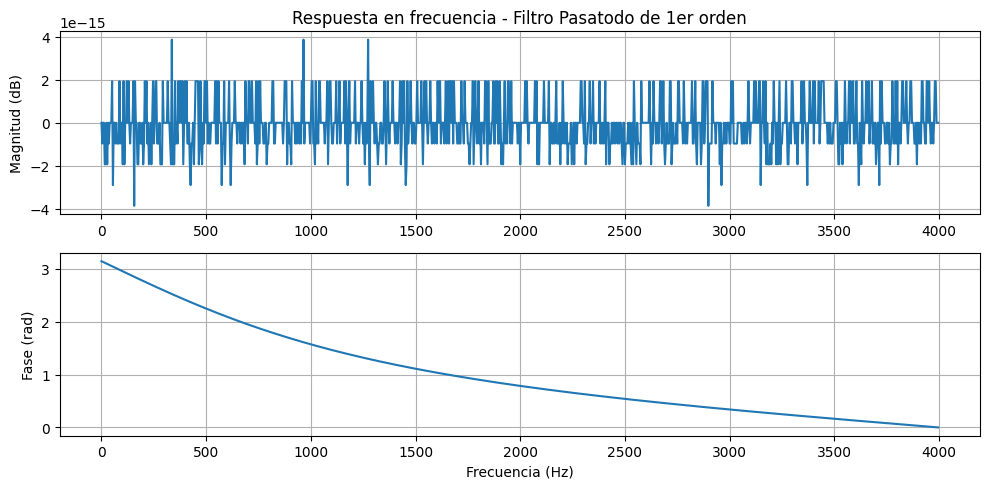

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Parámetros del diseño
fs = 8000.0        # frecuencia de muestreo (Hz)
fd = 1000.0        # frecuencia donde se desea controlar la fase (Hz)
T = 1.0 / fs
Omega_d = 2 * np.pi * fd / fs  # frecuencia digital normalizada (rad/muestra)

# Prewarp para bilineal
omega0 = 2.0 / T * np.tan(Omega_d / 2.0)

# Coeficientes (según derivación)
b0 = (2/T - omega0) / (2/T + omega0)
b1 = (-2/T - omega0) / (2/T + omega0)
a1 = (-2/T + omega0) / (2/T + omega0)

# Vector de coeficientes
b = np.array([b0, b1])
a = np.array([1.0, a1])

print("Coeficientes del filtro pasatodo de 1er orden:")
print(f"b = {b}")
print(f"a = {a}")

# Respuesta en frecuencia
w, h = freqz(b, a, worN=1024)
frecs = w * fs / (2*np.pi)  # frecuencia en Hz

# Gráficas
plt.figure(figsize=(10,5))

# Magnitud (dB)
plt.subplot(2,1,1)
plt.plot(frecs, 20*np.log10(np.abs(h)))
plt.title("Respuesta en frecuencia - Filtro Pasatodo de 1er orden")
plt.ylabel("Magnitud (dB)")
plt.grid(True)

# Fase (radianes)
plt.subplot(2,1,2)
plt.plot(frecs, np.unwrap(np.angle(h)))
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (rad)")
plt.grid(True)

plt.tight_layout()
plt.show()

Por último, y como parte adicional, se utiliza el siguiente código para comparar la respuesta en frecuencia del filtro analógico y la del digital.

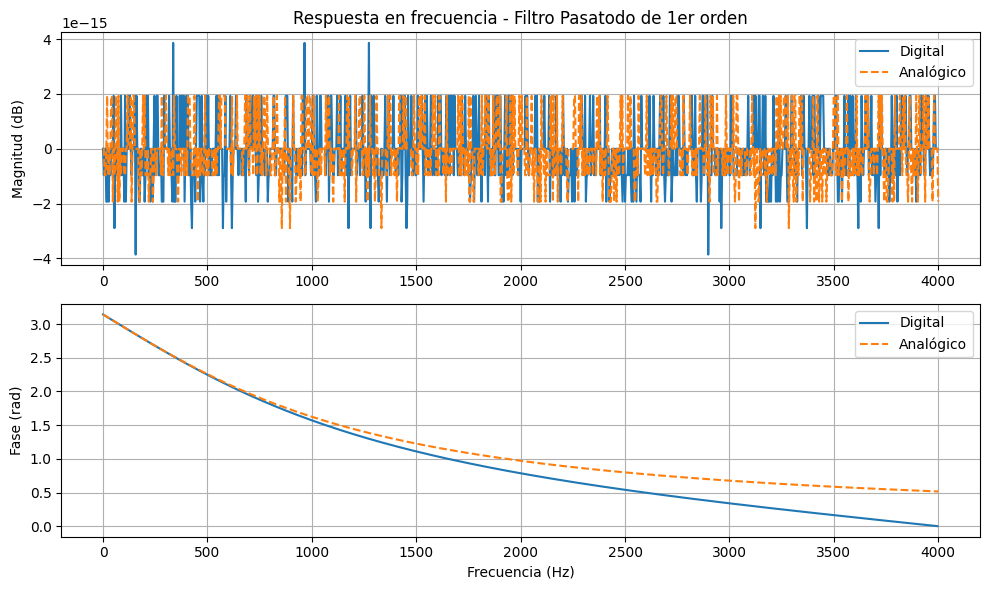

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# ==============================
# Parámetros de diseño
# ==============================
fs = 8000.0       # frecuencia de muestreo (Hz)
fd = 1000.0       # frecuencia digital objetivo (Hz)
T = 1.0 / fs
Omega_d = 2 * np.pi * fd / fs   # frecuencia digital normalizada (rad/muestra)

# Prewarp: frecuencia analógica equivalente
omega0 = 2.0 / T * np.tan(Omega_d / 2.0)

# ==============================
# Filtro analógico (fase teórica)
# ==============================
# Pasatodo analógico de 1er orden: H(s) = (s - ω0)/(s + ω0)
# Evaluamos en s = jΩ
Omega = np.linspace(0, np.pi*fs, 1024)   # frecuencia analógica en rad/s
s = 1j * Omega
H_analog = (s - omega0) / (s + omega0)

# ==============================
# Filtro digital (bilineal)
# ==============================
b0 = (2/T - omega0) / (2/T + omega0)
b1 = (-2/T - omega0) / (2/T + omega0)
a1 = (-2/T + omega0) / (2/T + omega0)

b = np.array([b0, b1])
a = np.array([1.0, a1])

# Respuesta digital
w, H_digital = freqz(b, a, worN=1024)
frecs = w * fs / (2*np.pi)  # en Hz

# ==============================
# Gráficas
# ==============================
plt.figure(figsize=(10,6))

# Magnitud
plt.subplot(2,1,1)
plt.plot(frecs, 20*np.log10(np.abs(H_digital)), label="Digital")
plt.plot(Omega/(2*np.pi), 20*np.log10(np.abs(H_analog)), '--', label="Analógico")
plt.title("Respuesta en frecuencia - Filtro Pasatodo de 1er orden")
plt.ylabel("Magnitud (dB)")
plt.legend()
plt.grid(True)

# Fase
plt.subplot(2,1,2)
plt.plot(frecs, np.unwrap(np.angle(H_digital)), label="Digital")
plt.plot(Omega/(2*np.pi), np.unwrap(np.angle(H_analog)), '--', label="Analógico")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (rad)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()